## Implementação de carro elétrico acionado por Motor CC com controle da velocidade pela tensão de armadura

### Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### EDOs das dinâmicas

In [32]:
# Dinâmica do motor e da translação

def func(x, t, L, Ea, Kv, Ra, J, b, r, c, m, g, alpha): # derivada da corrente
    dx0dt = (Ea - Kv * x[1] - Ra * x[0]) / L
    dx1dt = (Kv*x[0] - b*x[1] - c*x[1]**2*r - m*g*r*np.sin(alpha)) / J
    return [dx0dt, dx1dt]

### Parametrização

In [3]:
L = 0.02 # indutância
Kv = 1.39 # constante de velocidade
Ra = 0.2 # resistência de armadura

J = 0.05 # inércia
b = 0.1 # coeficiente de atrito viscoso

r = 10e-2 # raio da roda
c = 0.3 # coeficiente de atrito viscoso
m = 400 # massa
g = 9.8 # aceleração da gravidade

### Simulação da dinâmica

In [33]:
x0 = [0, 0]
Ea = 100
alpha = 0
t = np.linspace(0, 2, 500) # vetor de tempo
result = odeint(func, x0, t, args=(L, Ea, Kv, Ra, J, b, r, c, m, g, alpha))

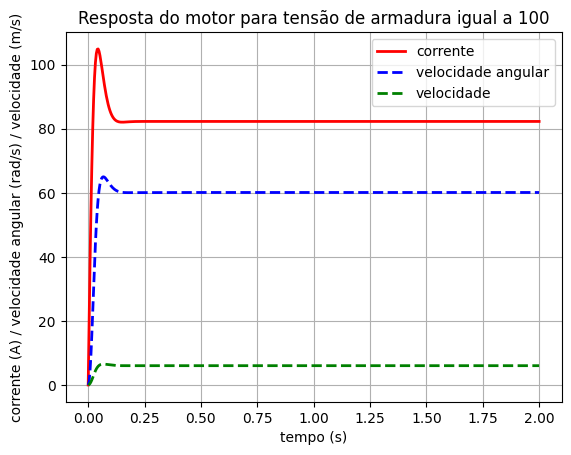

In [34]:
plt.figure()
plt.plot(t, result[:,0] , 'r-', linewidth=2, label='corrente')
plt.plot(t, result[:,1], 'b--', linewidth=2, label='velocidade angular')
plt.plot(t, result[:,1]*r, 'g--', linewidth=2, label='velocidade')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A) / velocidade angular (rad/s) / velocidade (m/s)')
plt.title(f'Resposta do motor para tensão de armadura igual a {Ea}')
plt.legend()
plt.grid()
plt.show()

In [14]:
def func_test(x, t, L, Ea, Kv, Ra, J, b, c):
    dx0dt = (Ea - Kv * x[1] - Ra * x[0]) / L
    dx1dt = (Kv*x[0] - b*x[1] - c*x[1]**2) / J
    # dx2dt = (Kv * x[0]/r - c * x[2] - m*g*np.sin(alpha)) / m
    return [dx0dt, dx1dt]

In [15]:
x0 = [0, 0]
Ea = 100
alpha = 0
t = np.linspace(0, 2, 500) # vetor de tempo
result_test = odeint(func_test, x0, t, args=(L, Ea, Kv, Ra, J, b, c))

In [48]:
print(result_test[-1])

[259.95410151  34.53897814]


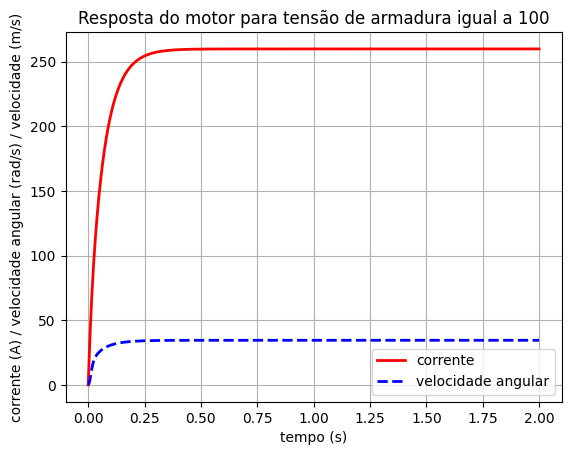

In [16]:
plt.figure()
plt.plot(t, result_test[:,0] , 'r-', linewidth=2, label='corrente')
plt.plot(t, result_test[:,1], 'b--', linewidth=2, label='velocidade angular')
# plt.plot(t, result_test[:,2], 'g--', linewidth=2, label='velocidade')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A) / velocidade angular (rad/s) / velocidade (m/s)')
plt.title(f'Resposta do motor para tensão de armadura igual a {Ea}')
plt.legend()
plt.grid()
plt.show()

### Implementando a malha de controle

In [50]:
u = [0, 0]
e = [0, 0]
y = [0, 0]
Kp = 1
v_ref = 10
Ea_plot = []
v_plot = []
x0 = [0, 0]
alpha = 0
t = np.linspace(0, 2, 500) # vetor de tempo

for k in range(100):
    u[1] = u[0]
    e[1] = e[0]
    y[1] = y[0]
    result = odeint(func, x0, t, args=(L, u[1], Kv, Ra, J, b, r, c, m, g, alpha))
    y[0] = result[1]*r
    x0 = [result[-1][0], result[-1][1]]
    e[0] = v_ref - y[0]
    u[0] = u[1] + Kp * (e[0] - e[1])
    Ea_plot.append(u[0])
    v_plot.append(y[0])
    Ea = u[0]

plt.figure()
plt.plot(range(100), Ea_plot, 'r-', linewidth=2, label='tensão de armadura')
plt.plot(range(100), v_plot, 'g:', linewidth=2, label='velocidade')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A), velocidade angular (rad/s), velocidade (m/s)')
plt.legend(loc='best')
plt.grid()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.